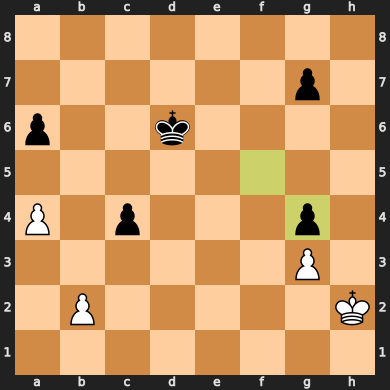

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import chess

from env import *
env = Chess_env()
obs = env.reset()

from deepQ import *


env.board

d6d5
h2g1


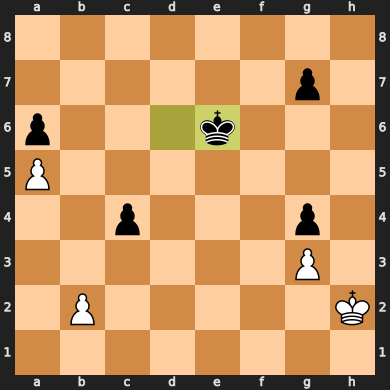

In [2]:
for step in range(2):
    action = np.random.choice(list(env.board.legal_moves))
    _,_,done,_ = env.step(action)
        

    stockfish.set_fen_position(env.board.fen())
    print(stockfish.get_best_move())

env.board

In [3]:
model = DeepQ(env, dropout_rate=0.2, n_channels=128, n_residual=15)
model.model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 8, 8, 16)]   0                                            
__________________________________________________________________________________________________
model (Functional)              (None, 8, 8, 128)    4461952     input_4[0][0]                    
__________________________________________________________________________________________________
conv2d_67 (Conv2D)              (None, 8, 8, 1)      129         model[0][0]                      
__________________________________________________________________________________________________
dropout_65 (Dropout)            (None, 8, 8, 1)      0           conv2d_67[0][0]                  
____________________________________________________________________________________________

In [4]:
model.model = keras.models.load_model('pretrained')
model.target_model = keras.models.load_model('pretrained')

model.model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 8, 8, 16)]   0                                            
__________________________________________________________________________________________________
model (Functional)              (None, 8, 8, 128)    4461952     input_4[0][0]                    
__________________________________________________________________________________________________
conv2d_67 (Conv2D)              (None, 8, 8, 1)      129         model[0][0]                      
__________________________________________________________________________________________________
dropout_65 (Dropout)            (None, 8, 8, 1)      0           conv2d_67[0][0]                  
____________________________________________________________________________________________

In [ ]:
model.pre_train(
            max_epoch= 200*64, 
            batch_size = 64,
            max_steps_per_episode = 75, 
            learning_rate = 1e-4,
            update_target = 1000000000000000,
            jupyter=True,
            random_best_action=0.7,
            n_top_move= 1000, 
            name='pretrained'
        )

In [5]:
%%time
model.predict_move_to_play_MCTS(2, env,100)

Wall time: 2.75 s


'd6e5'

In [6]:
import warnings
warnings.filterwarnings('ignore')

model.train(
    max_epoch = 3000, 
    epsilon_random_frames = 0,
    epsilon_greedy_frames = 5,
    epsilon = 0.01,
    epsilon_min = 0.,
    batch_size = 16,
    max_steps_per_episode = 50,
    learning_rate=1e-3,
    MCTS_depth=2,
    MCTS_iterations=100,
    name='model_long_training',
    update_target=16*2,
    elo = 1700
    )

Batch : 1/16


 33%|███▎      | 16/49 [00:31<01:04,  1.95s/it]

Won
0.0


Batch : 2/16


 35%|███▍      | 17/49 [00:49<01:32,  2.90s/it]

Lost
0.0


Batch : 3/16


 41%|████      | 20/49 [00:55<01:20,  2.79s/it]

Won
0.0


Batch : 4/16


 37%|███▋      | 18/49 [00:54<01:33,  3.03s/it]

Lost
0.0


Batch : 5/16


 37%|███▋      | 18/49 [00:51<01:28,  2.86s/it]

Won
0.0


Batch : 6/16


 37%|███▋      | 18/49 [00:54<01:34,  3.03s/it]

Won
0.0


Batch : 7/16


 37%|███▋      | 18/49 [00:55<01:34,  3.06s/it]

Won
0.0


Batch : 8/16


 47%|████▋     | 23/49 [01:12<01:21,  3.13s/it]

Won
0.0


Batch : 9/16


 35%|███▍      | 17/49 [00:41<01:18,  2.45s/it]

Lost
0.0


Batch : 10/16


 31%|███       | 15/49 [00:36<01:22,  2.44s/it]

Lost
0.0


Batch : 11/16


 35%|███▍      | 17/49 [00:30<00:57,  1.80s/it]

Won
0.0


Batch : 12/16


 16%|█▋        | 8/49 [00:17<01:30,  2.22s/it]


KeyboardInterrupt: 

In [8]:
stockfish = Stockfish(path="C:/Users/Philippe/Downloads/stockfish_13_win_x64_avx2/stockfish_13_win_x64_avx2")


In [14]:

n_won = 0
for _ in range(100):
    _ = env.reset()
    for i in tqdm(range(150)):

        if i%2 ==0:
            action = model.predict_move_to_play_MCTS(2,env,100)
        else:
            stockfish.set_elo_rating(100)
            stockfish.set_fen_position(env.board.fen())
            action = stockfish.get_best_move()
        _,_,done,_ = env.step(action)


        if done:
            if i%2 == 0:
                print("WON")
                n_won += 1
            else:
                print("LOST")
            break
        
        

 25%|██▍       | 37/150 [00:22<01:08,  1.66it/s]


LOST


 35%|███▌      | 53/150 [00:33<01:01,  1.58it/s]


LOST


 31%|███▏      | 47/150 [00:22<00:49,  2.09it/s]


LOST


 30%|███       | 45/150 [00:28<01:06,  1.58it/s]


LOST


 22%|██▏       | 33/150 [00:19<01:07,  1.72it/s]


LOST


 15%|█▍        | 22/150 [00:14<01:22,  1.55it/s]


KeyboardInterrupt: 

In [4]:
_=env.reset()

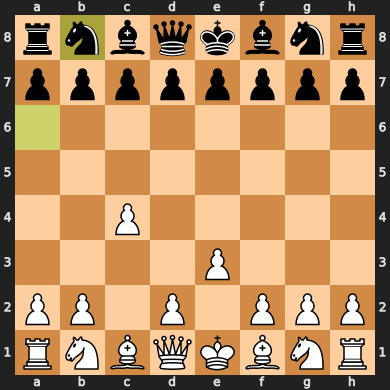

In [5]:
env.board

In [6]:
stockfish.set_fen_position(env.board.fen())

stockfish.get_evaluation()

{'type': 'cp', 'value': 161}

In [7]:
model.predict_move_to_play_MCTS(2,env,10)

NameError: name 'model' is not defined

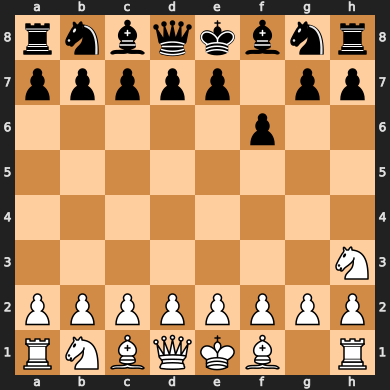

In [10]:
fen_mirror = reverse_fen(env.board.fen()).split(' ')
fen_mirror[1] = 'w'
fen_mirror = fen_mirror[0] + ' ' + fen_mirror[1] + ' ' + fen_mirror[2] + ' ' + fen_mirror[3] + ' ' + fen_mirror[4] + ' ' + fen_mirror[5] + ' ' 

env_mirror = Chess_env(fen_mirror)
env_mirror.board

In [11]:
model.predict_move_to_play_MCTS(2,env,10, white=False)

[array([0.1747404], dtype=float32), array([0.17555086], dtype=float32), array([0.17371492], dtype=float32), array([0.17294554], dtype=float32), array([0.17288454], dtype=float32), array([0.17680149], dtype=float32), array([0.17397746], dtype=float32), array([0.17288454], dtype=float32), array([0.17397746], dtype=float32), array([0.17371492], dtype=float32)] ['a2a4', 'h2h4', 'd2d3', 'e2e4', 'g2g4', 'b1c3', 'b2b3', 'g2g4', 'b2b3', 'd2d3']
{'a2a4': [0.1747404], 'h2h4': [0.17555086], 'd2d3': [0.17371492, 0.17371492], 'e2e4': [0.17294554], 'g2g4': [0.17288454, 0.17288454], 'b1c3': [0.17680149], 'b2b3': [0.17397746, 0.17397746]}


'b1c3'